# EDA - Predecir el coste del seguro médico de una persona 4Geeks Insurance S.L.

In [85]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Problem statement and data collection

In [86]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Exploration and data cleaning
# 2.1 Understanding the features:

- 'age'- Edad del beneficiario principal -> n
- 'sex'- Género del beneficiario principal  -> c
- 'bmi'- índice de masa corporal  -> n
- 'children'- Número de niños/dependientes cubiertos por un seguro médico -> n
- 'smoker'- ¿Es fumador? -> c
- 'region'- Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste  -> c
- 'charges'- Prima del seguro médico -> n

* n - numerical / c - categorical

In [87]:
# Obtener las dimensiones
print('Our dataframe contains {} rows, indicating the total number of rentals, and has a shape of {}.'.format(len(total_data), total_data.shape))

Our dataframe contains 1338 rows, indicating the total number of rentals, and has a shape of (1338, 7).


In [88]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 2.2 Identifying Null Values and data types for each feature

In [89]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

# 2.3 Looking for duplicated and dropping them, if any.

In [90]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2.4 Dealing with null values

In [91]:
#Sacamos el porcentaje de valores NaN
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# 3. Univariate Analysis
# 3.1 Dividing our dataset into categorial and numerical.

In [92]:
#Analizamos los tipos de información que tenemos
total_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [93]:
#Dividimos el datafram original por valores numéricos y categóricos
num = ['int64', 'float64']
cat = ['O']

df_num = total_data.select_dtypes(num)
df_cat = total_data.select_dtypes(cat)

In [94]:
df_cat.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


# 3.2 Categorical Variable Analysis

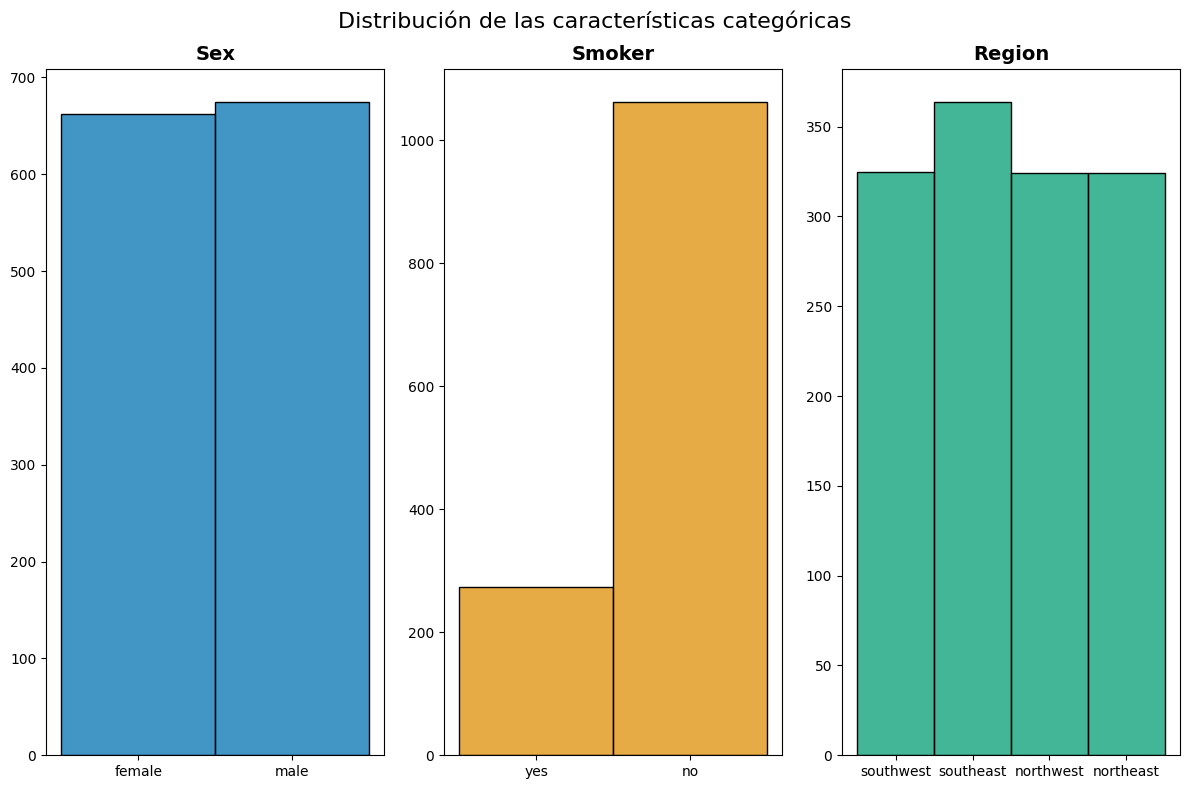

In [95]:
fig, axis = plt.subplots(1, 3, figsize=(12, 8))
fig.suptitle("Distribución de las características categóricas", fontsize=16)

categorias = [
    ("sex", 0, 0),
    ("smoker", 0, 1),
    ("region", 0, 2),
]
colores = sns.color_palette("colorblind")

for i, (col, row, col_pos) in enumerate(categorias):
    ax = axis[col_pos]
    sns.histplot(data=df_cat, x=col, ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Análisis

# 3.3 Numerical Variable Analysis

In [96]:
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


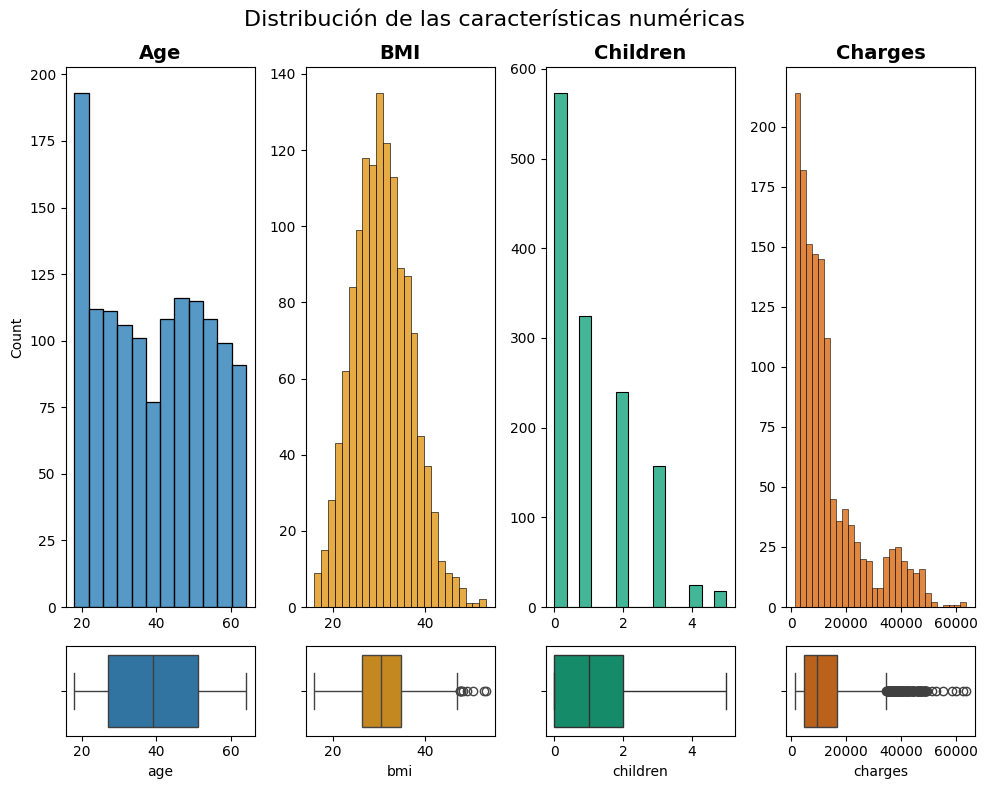

In [97]:
#Analisis con histogramas y boxplot de las características numéricas
fig, axis = plt.subplots(2, 4, figsize = (10, 8), gridspec_kw = {"height_ratios": [6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = df_num, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_num, x = "age")

sns.histplot(ax = axis[0, 1], data = df_num, x = "bmi", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_num, x = "bmi", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df_num, x = "children", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df_num, x = "children", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = df_num, x = "charges", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df_num, x = "charges", color=sns.color_palette("colorblind")[3])

axis[0, 0].set_title("Age", fontsize=14, fontweight='bold')
axis[0, 1].set_title("BMI", fontsize=14, fontweight='bold')
axis[0, 2].set_title("Children", fontsize=14, fontweight='bold')
axis[0, 3].set_title("Charges", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Multivariate Analysis

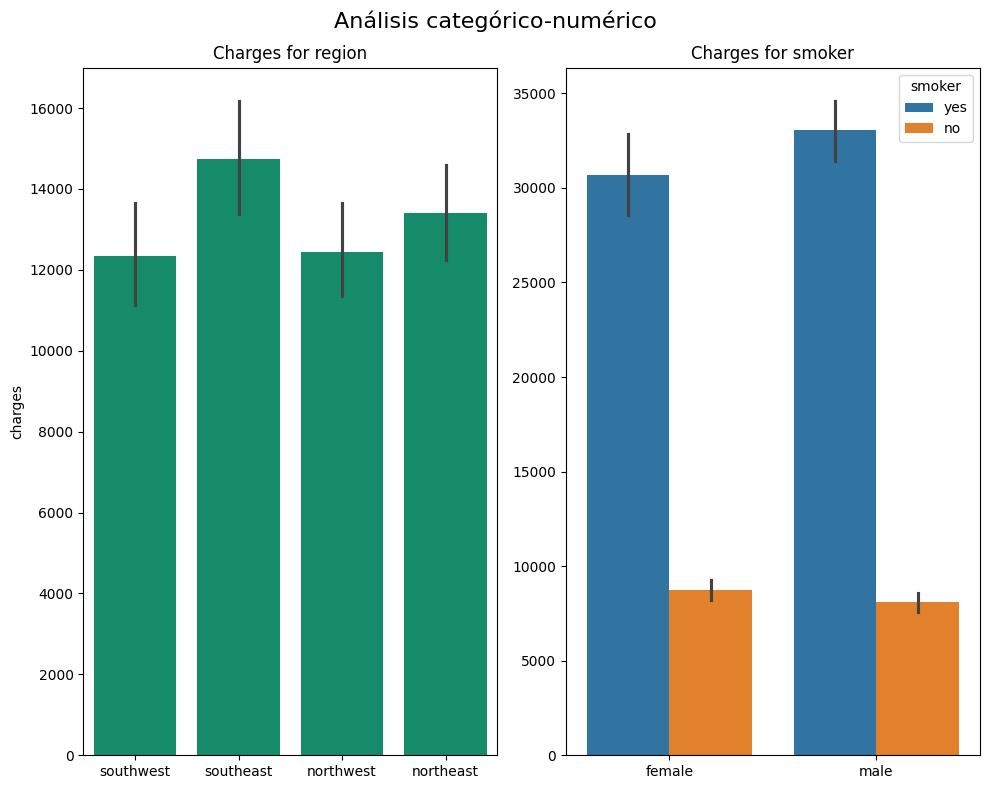

In [98]:
#Analisis de varias variables, pt.2

fig, axis = plt.subplots(1, 2, figsize = (10, 8))
fig.suptitle("Análisis categórico-numérico", fontsize=16)

sns.barplot(ax = axis[0], data = total_data, x="region", y = "charges", color=sns.color_palette("colorblind")[2]).set(xlabel= None, title = "Charges for region")
sns.barplot(ax = axis[1], data = total_data, x="sex", y = "charges", hue = "smoker").set(xlabel= None, ylabel = None, title = "Charges for smoker")

plt.tight_layout()
plt.show()

Análisis

# 4.1 Encoding Categorical Values and Saving JSON files

In [99]:
s = list(total_data['sex'].unique())
sex_encoded = dict(zip(s, list(range(len(s)))))

with open('../data/interim/sex_encoded.json', 'w') as f: 
    json.dump(sex_encoded, f)

In [100]:
sm = list(total_data['smoker'].unique())
smoker_encoded = dict(zip(sm, list(range(len(sm)))))

with open('../data/interim/smoker_encoded.json', 'w') as f:
    json.dump(smoker_encoded, f)

In [101]:
r = list(total_data['region'].unique())
region_encoded = dict(zip(r, list(range(len(r)))))

with open('../data/interim/region_encoded.json', 'w') as f:
    json.dump(region_encoded, f)

In [102]:
#Hacemos una copia del data frame con outliers
df_enc = total_data.copy()

In [103]:
df_enc['sex_encoded'] = df_enc['sex'].map(sex_encoded)
df_enc['smoker_encoded'] = df_enc['smoker'].map(smoker_encoded)
df_enc['region_encoded'] = df_enc['region'].map(region_encoded)
df_enc.drop(columns=['sex', 'smoker', 'region'], inplace=True)
df_enc.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


<function matplotlib.pyplot.show(close=None, block=None)>

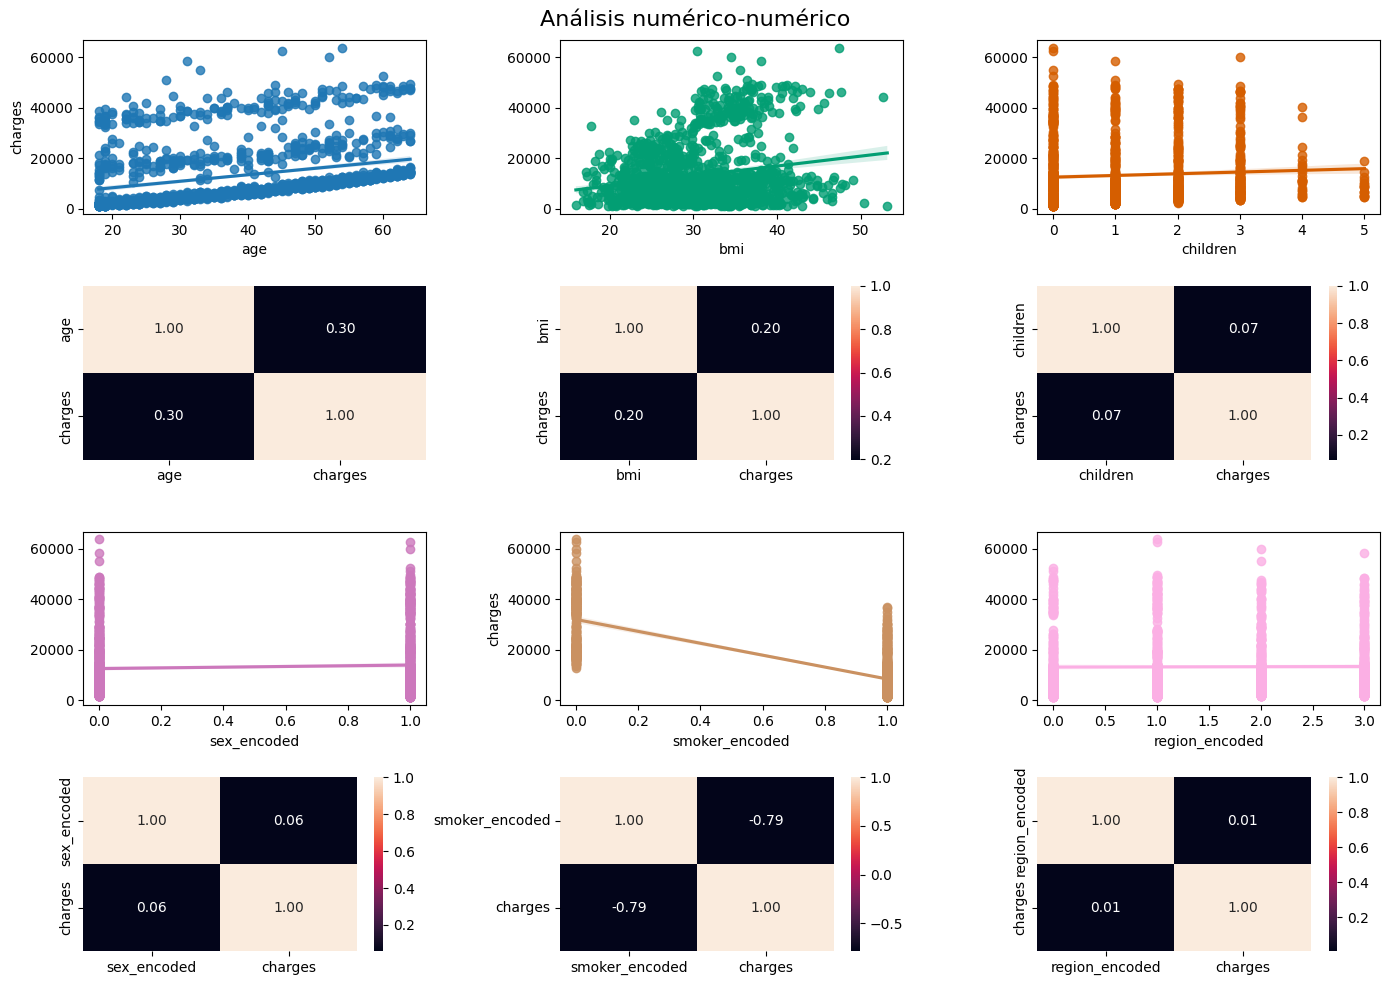

In [104]:
#Analisis de varias variables pt.2

fig, axis = plt.subplots(4, 3, figsize = (14, 10))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

sns.regplot(ax = axis[0, 0], data = df_enc, x = "age", y = "charges")
sns.heatmap(df_enc[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_enc, x = "bmi", y = "charges", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(df_enc[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df_enc, x = "children", y = "charges", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(df_enc[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = df_enc, x = "sex_encoded", y = "charges", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(df_enc[["sex_encoded", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = df_enc, x = "smoker_encoded", y = "charges", color=sns.color_palette("colorblind")[5])
sns.heatmap(df_enc[["smoker_encoded", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[2, 2], data = df_enc, x = "region_encoded", y = "charges", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(df_enc[["region_encoded", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

plt.tight_layout()
plt.show

Analisis

# 4.2 Numerical - categorical analysis (Correlation Analysis)

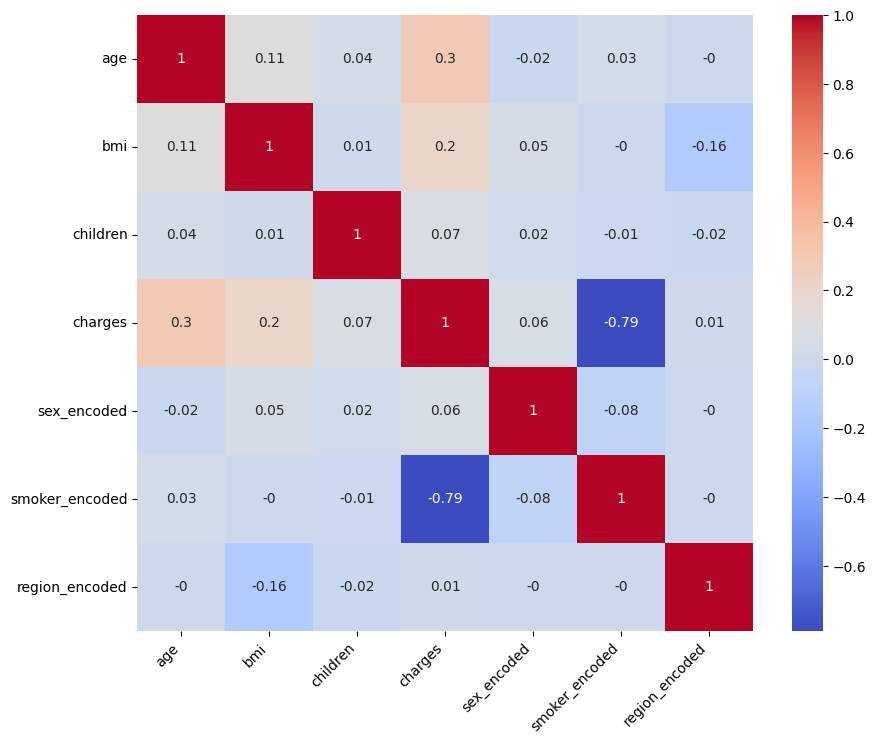

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')

plt.show()

Análisis

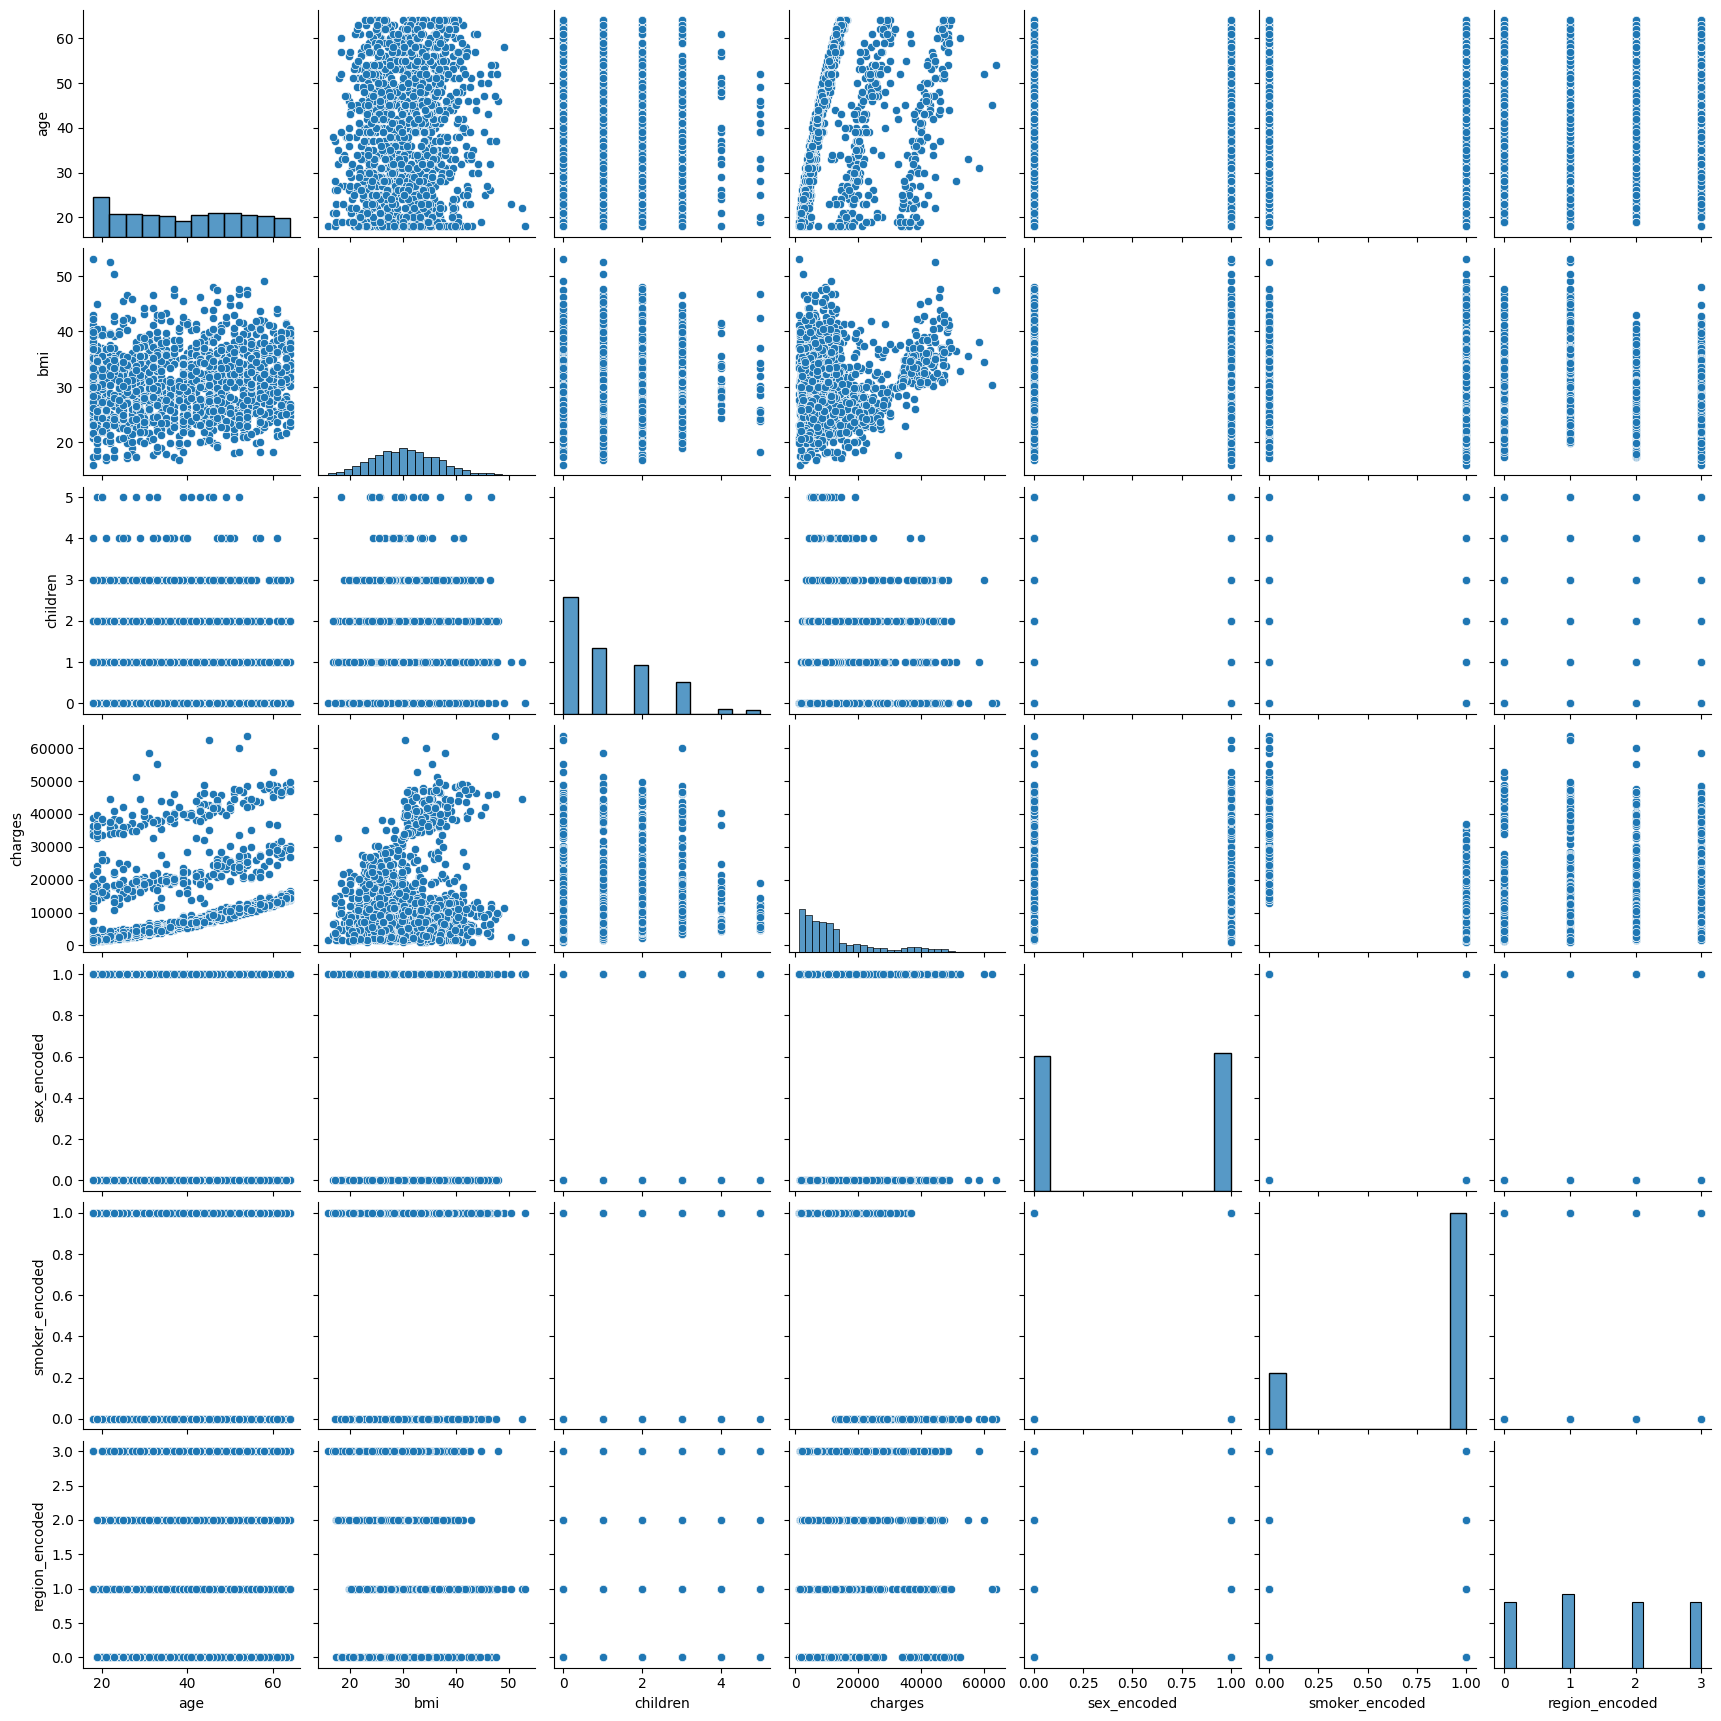

In [106]:
sns.pairplot(data=df_enc)
plt.show()

# 5. Feature Engineering
# 5.1 Outlier Analysis

In [107]:
#Análisis de outliers
df_enc.describe().round(2)

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
count,1337.00,1337.00,1337.00,1337.00,1337.0,1337.0,1337.00
mean,39.22,30.66,1.10,13279.12,0.5,0.8,1.48
std,14.04,6.10,1.21,12110.36,0.5,0.4,1.11
min,18.00,15.96,0.00,1121.87,0.0,0.0,0.00
25%,27.00,26.29,0.00,4746.34,0.0,1.0,1.00
50%,39.00,30.40,1.00,9386.16,1.0,1.0,1.00
75%,51.00,34.70,2.00,16657.72,1.0,1.0,2.00
max,64.00,53.13,5.00,63770.43,1.0,1.0,3.00


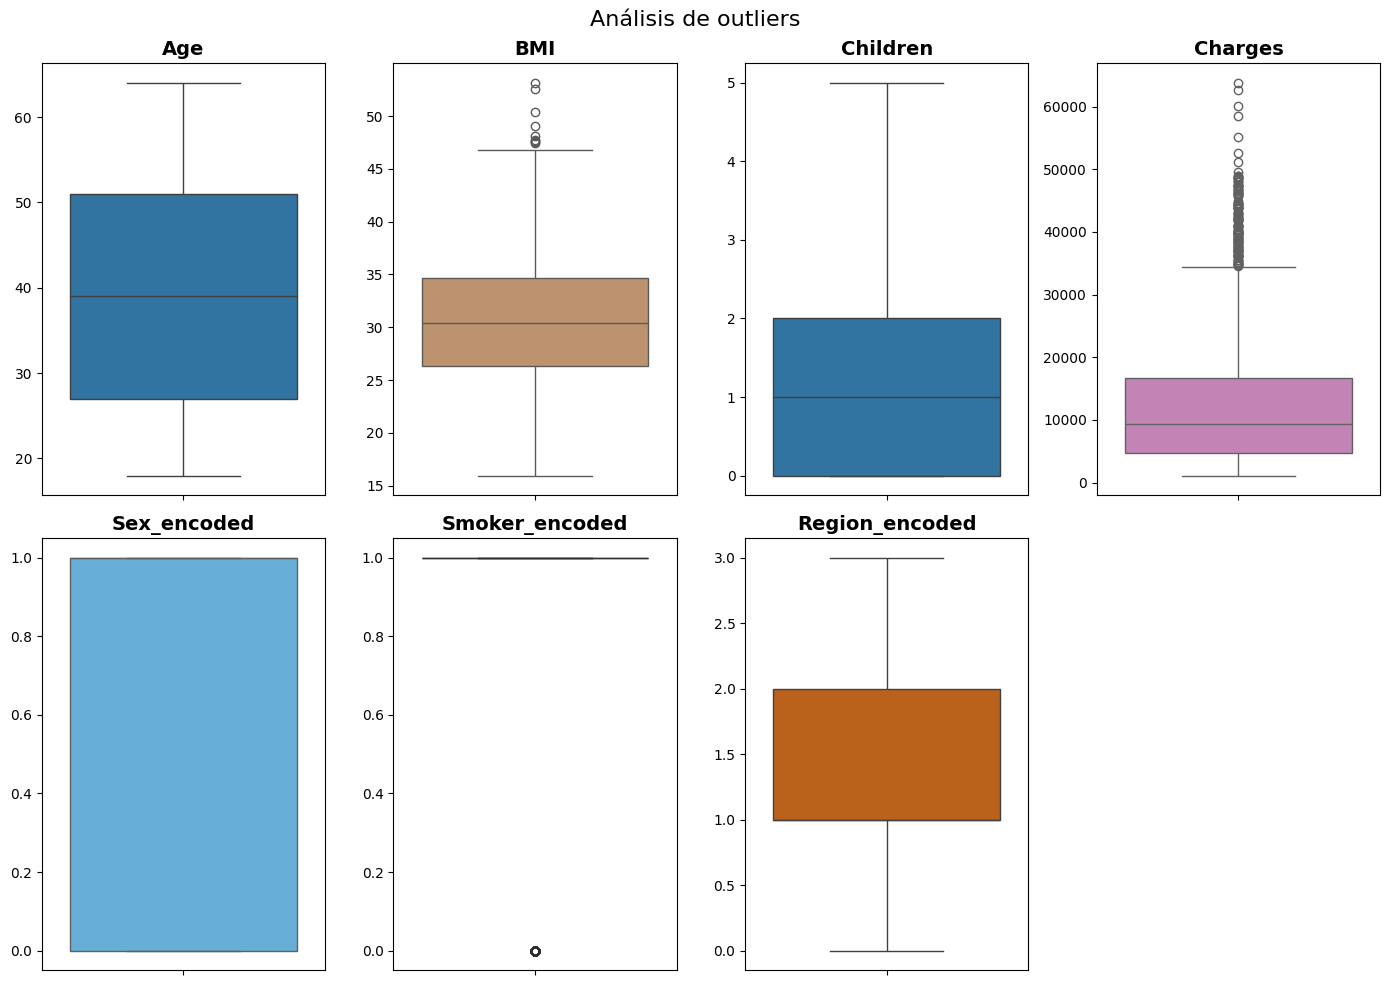

In [108]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "age").set_title("Age", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "bmi", color=sns.color_palette("colorblind")[5]).set_title("BMI", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "children").set_title("Children", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "charges", color=sns.color_palette("colorblind")[4]).set_title("Charges", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "sex_encoded", color=sns.color_palette("colorblind")[9]).set_title("Sex_encoded", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "smoker_encoded", color=sns.color_palette("colorblind")[2]).set_title("Smoker_encoded", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "region_encoded", color=sns.color_palette("colorblind")[3]).set_title("Region_encoded", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()

In [109]:
#Creamos una copia sin outliers
df_enc_no = df_enc.copy()

In [110]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [111]:
df_enc_no['bmi'] = remove_outliers(df_enc_no['bmi'], 'bmi')
df_enc_no['charges'] = remove_outliers(df_enc_no['charges'], 'charges')
df_enc_no['smoker_encoded'] = remove_outliers(df_enc_no['smoker_encoded'], 'smoker_encoded')

# 5.2 Missing Values

In [112]:
df_enc.isna().sum()

age               0
bmi               0
children          0
charges           0
sex_encoded       0
smoker_encoded    0
region_encoded    0
dtype: int64

# 5.3 Split train/test of both Data Frames

In [113]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [114]:
#Dividimos el data frame original
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('charges', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('charges', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# 5.4 Normalization

In [115]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/interim/_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [116]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 5.5 Min-Max Scaling

In [117]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [118]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 6. Feature Selection

In [119]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [120]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 7, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 7, 'without_outliers')

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=7 is greater than n_features=6. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=7 is greater than n_features=6. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


# 6.1 Applying the filter to the normalized and minmax scaled data frames

In [121]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

# 6.2 Saving the CSV files

In [122]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [123]:
# Data frame de entrenamiento
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Data frame de prueba
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

# Machine Learning
# 1. Decision making: Which is the best dataset?

In [124]:
# Train data frames
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Test data frames
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [125]:
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

results = []
models = []

for df_index in range(len(train_dfs)):
  model = LogisticRegression()
  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)
  y_train_pred = model.predict(train_df)
  y_test_pred = model.predict(test_dfs[df_index])

  results.append(
    {
        "index": df_index,
        "train_score": accuracy_score(y_train, y_train_pred),
        "test_score": accuracy_score(y_test, y_test_pred)
    }
  )
  models.append(model)
sorted(results, key = lambda x: x["train_score"], reverse = True)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.